## Principal Component Analysis 

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.plotly as pltly
from plotly.graph_objs import Bar
from plotly.graph_objs import Scatter
from plotly.graph_objs import Layout
from plotly.graph_objs import Data
from plotly.graph_objs import YAxis
from plotly.graph_objs import Figure

In [3]:
iris_data = load_iris()
iris_data

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [5]:
iris_labels = np.array(iris_data.target)
iris_label_to_names = np.vectorize(lambda t: 'iris_' + iris_data.target_names[t])
iris_names = iris_label_to_names(iris_labels)

In [6]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['iris name'] = iris_names
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris name
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa
5,5.4,3.9,1.7,0.4,iris_setosa
6,4.6,3.4,1.4,0.3,iris_setosa
7,5.0,3.4,1.5,0.2,iris_setosa
8,4.4,2.9,1.4,0.2,iris_setosa
9,4.9,3.1,1.5,0.1,iris_setosa


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
iris name            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
import seaborn as sns
sns.set(style='ticks')

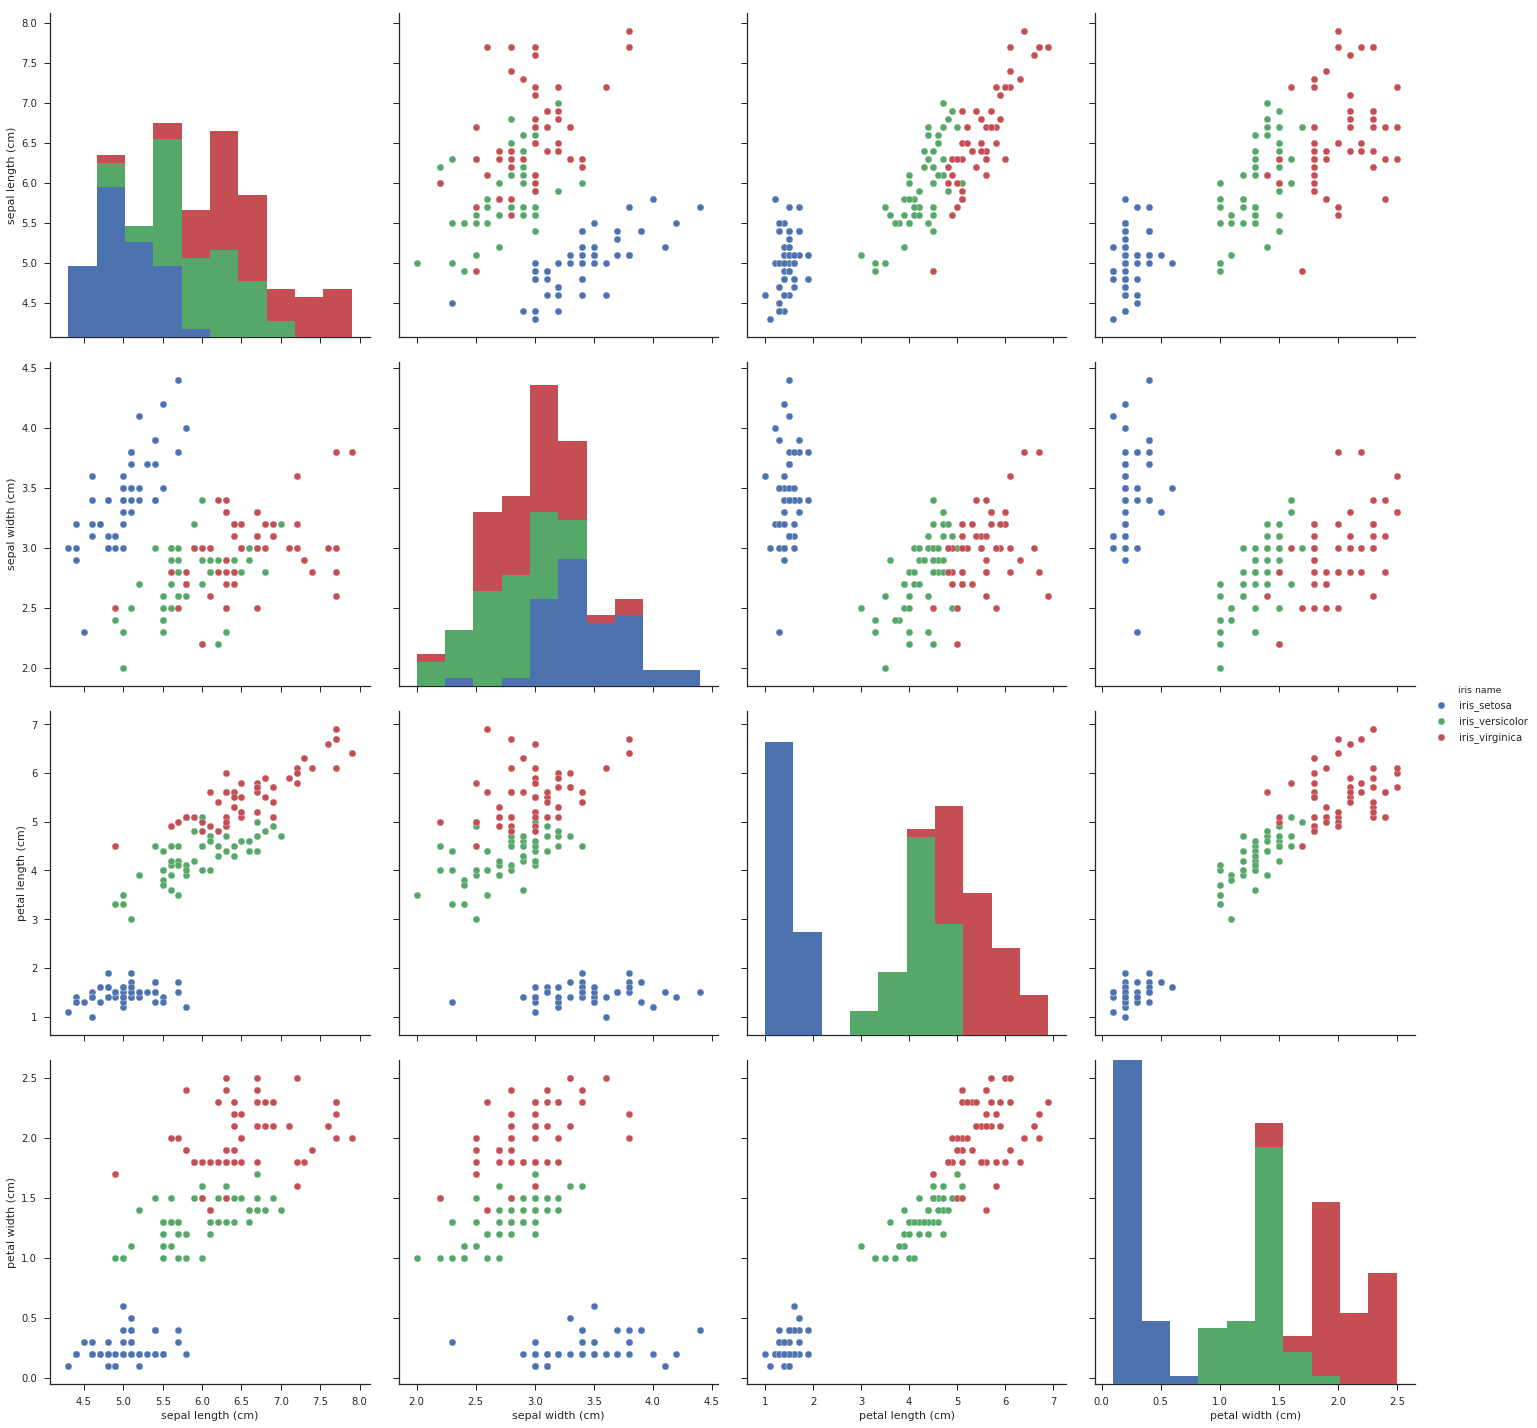

In [53]:
sns.pairplot(iris_df, hue='iris name', size=5)

In [11]:
x = iris_df.ix[:, 0:4].values
y = iris_df.ix[:,4].values

x, y

/home/kwrongkey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

### 标准化数据 （Standardize features by removing the mean and scaling to unit variance）
$$x^* = (x - \mu) / \sigma$$
* 标准化后数据的协方差矩阵和相关性系数矩阵一致 （展现了不同feature之间的相关性）

In [12]:
x_std = StandardScaler().fit_transform(x)

In [13]:
x_cov_mat = np.cov(x_std.T)
x_cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Text(0.5,1,'Covarince between different features')

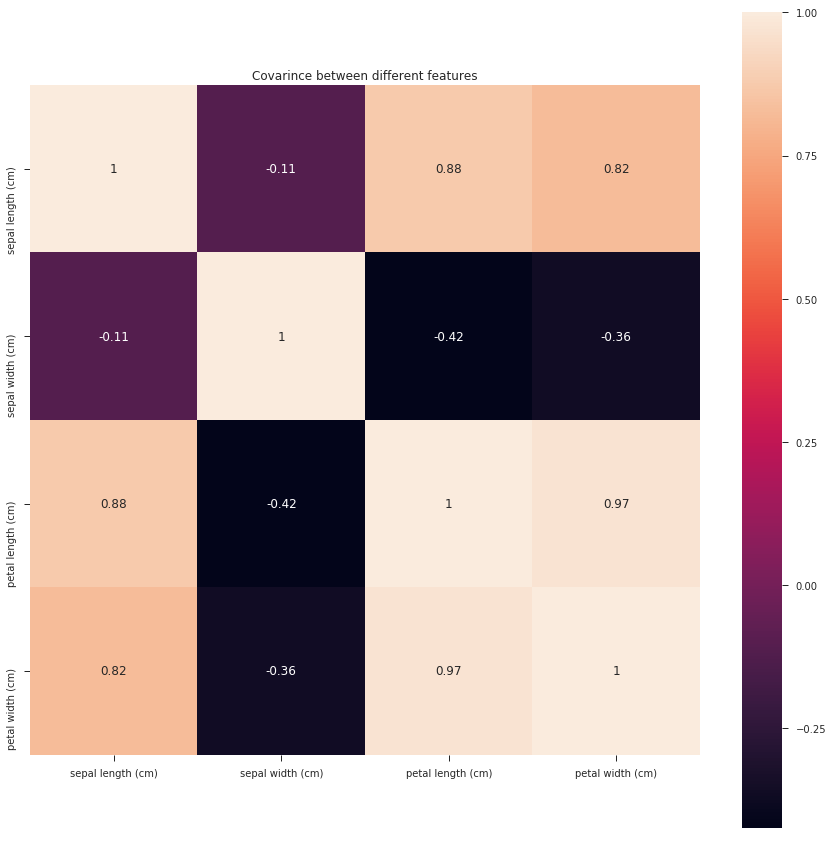

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(x_cov_mat, vmax=1, square=True, annot=True, xticklabels=iris_data.feature_names, yticklabels=iris_data.feature_names)
plt.title('Covarince between different features')

Text(0.5,1,'Correlation between different features')

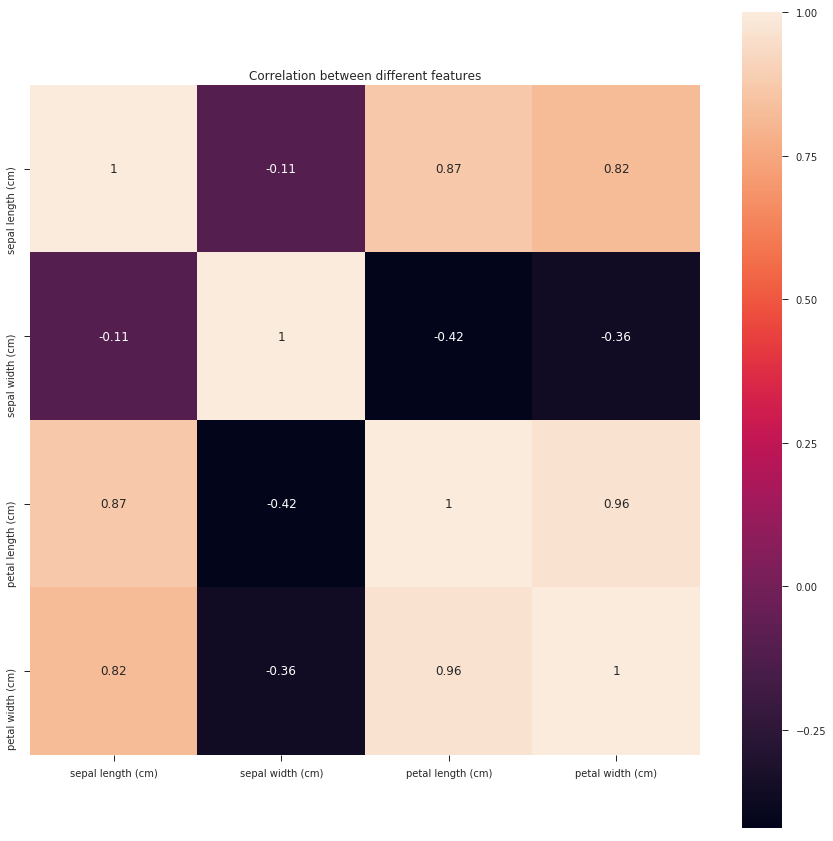

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(iris_df.corr(), vmax=1, square=True, annot=True)
plt.title('Correlation between different features')

### 计算协方差矩阵的特征值和特征向量

In [21]:
eig_values, eig_vectors = np.linalg.eig(x_cov_mat)
eig_values, eig_vectors

(array([2.93035378, 0.92740362, 0.14834223, 0.02074601]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [24]:
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]
eig_pairs.sort()
eig_pairs.reverse()

for eig_val, eig_vec in eig_pairs:
    print(eig_val, eig_vec)

2.930353775589319 [ 0.52237162 -0.26335492  0.58125401  0.56561105]
0.9274036215173421 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
0.14834222648163983 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
0.02074601399559602 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]


### 计算各个Principal Component Explained Variance ( The explained variance tells us how much information (variance) can be attributed to each of the principal components.)

In [18]:
sum_eig_values = sum(eig_values)
percent_explained_variance = eig_values / sum_eig_values * 100
cum_percent_explained_variance = np.cumsum(percent_explained_variance)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=percent_explained_variance,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_percent_explained_variance,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
pltly.iplot(fig)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kwrongkey/0 or inside your plot.ly account where it is named 'plot from API'


根据上图特征值最大的两个Principle Component能够解释接近96%的方差，接下来将数据集投影到最大的两个特征值对应的特征向量张成的二维空间

In [26]:
projection_space = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
projection_space

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [27]:
y = x_std.dot(project_space)
y

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

In [46]:
y_df = pd.DataFrame(data=y, columns=['PC1', 'PC2'])
y_df['iris name'] = iris_names
y_df

,PC1,PC2,iris name
0,-2.264542,-0.505704,iris_setosa
1,-2.086426,0.655405,iris_setosa
2,-2.367950,0.318477,iris_setosa
3,-2.304197,0.575368,iris_setosa
4,-2.388777,-0.674767,iris_setosa
5,-2.070537,-1.518549,iris_setosa
6,-2.445711,-0.074563,iris_setosa
7,-2.233842,-0.247614,iris_setosa
8,-2.341958,1.095146,iris_setosa
9,-2.188676,0.448629,iris_setosa


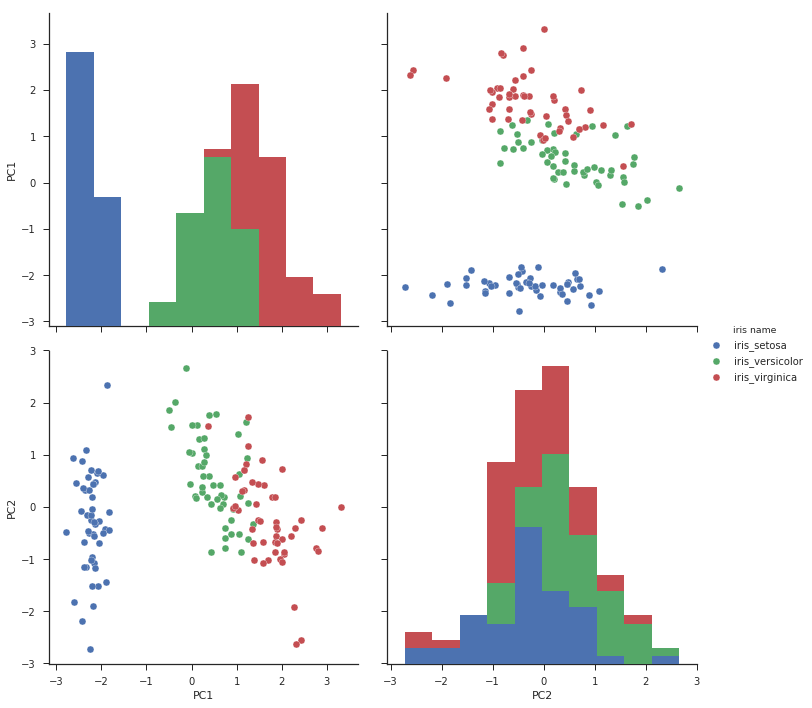

In [61]:
sns.pairplot(y_df, hue='iris name', size=5)

### 使用sklearn的PCA快速实现

In [60]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=2)
sklearn_pca_y = sklearn_pca.fit_transform(x_std) 

sklearn_pca_y_df = pd.DataFrame(data=sklearn_pca_y, columns=['PC1', 'PC2'])
sklearn_pca_y_df

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


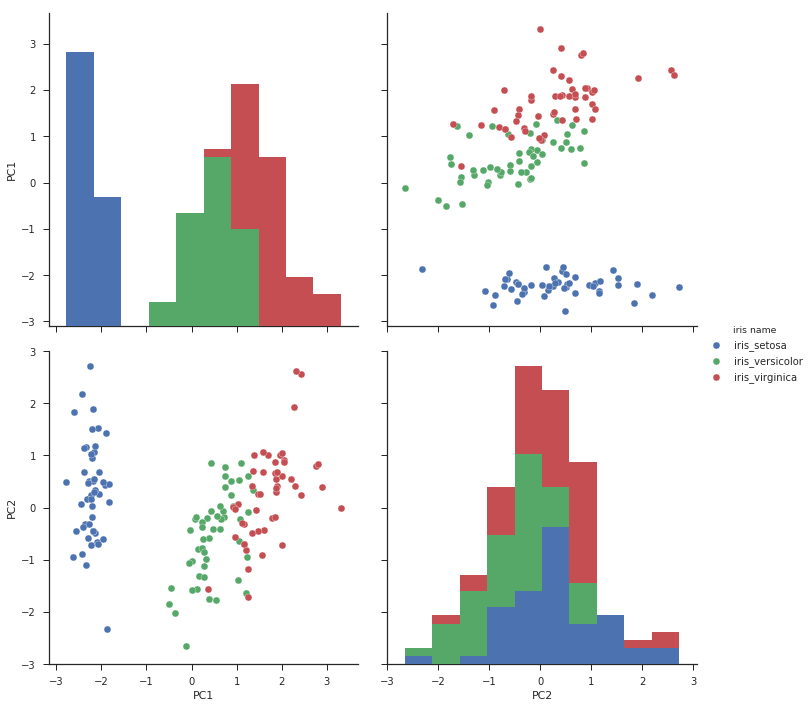

In [62]:
sklearn_pca_y_df['iris name'] = iris_names
sns.pairplot(sklearn_pca_y_df, hue='iris name', size=5)